In [ ]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2023-01-19 08:27:44--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip.4’

book-crossings.zip. 100%[===================>]  24.88M  38.8MB/s    in 0.6s    

2023-01-19 08:27:45 (38.8 MB/s) - ‘book-crossings.zip.4’ saved [26085508/26085508]

Archive:  book-crossings.zip
replace BX-Book-Ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

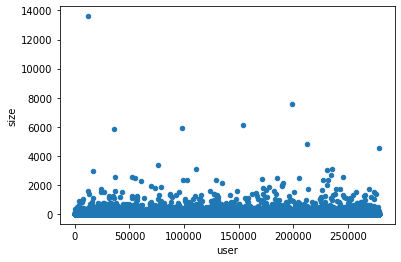

In [ ]:
# add your code here - consider creating a new cell for each section of code

#graph dataset attempt
df_books_graph = df_ratings.groupby("user", as_index=False).size()
graph = df_books_graph.plot.scatter(x='user',y='size')

In [ ]:
# users with less than 200 ratings
users_less_200 = df_ratings.groupby("user", as_index=False).size()
#users_less_200
users_less_200_list = users_less_200[users_less_200["size"] < 200]
#users_less_200_list
users_less_200_list = users_less_200_list['user'].values.tolist()
#users_less_200_list


In [ ]:
# books with less than 100 ratings
books_less_100 = df_ratings.groupby("isbn", as_index=False).size()
#books_less_100
books_less_100_list = books_less_100[books_less_100["size"] < 100]
#books_less_100_list
books_less_100_list = books_less_100_list['isbn'].values.tolist()
#books_less_100_list


In [ ]:
# remove from the dataset users with less than 200 ratings and books with less than 100 ratings
df_ratings_filtered = df_ratings[~df_ratings['user'].isin(users_less_200_list)]
df_ratings_filtered = df_ratings_filtered[~df_ratings_filtered['isbn'].isin(books_less_100_list)]
df_ratings_filtered

,user,isbn,rating
1456,277427,002542730X,10.0
1469,277427,0060930535,0.0
1471,277427,0060934417,0.0
1474,277427,0061009059,9.0
1484,277427,0140067477,0.0
...,...,...,...
1147304,275970,0804111359,0.0
1147436,275970,140003065X,0.0
1147439,275970,1400031346,0.0
1147440,275970,1400031354,0.0


In [ ]:
# testing dataframe selection
test = "The Queen of the Damned (Vampire Chronicles (Paperback))"
isbn_test = df_books.loc[df_books['title'] == test]['isbn'].values[0]
isbn_test

'0345351525'

In [ ]:
# pivot dataframe
df_ratings_pivot = df_ratings_filtered.pivot(index='isbn', columns='user', values='rating').fillna(0)
df_ratings_pivot

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
isbn,,,,,,,,,,,,,,,,,,,,,
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
0060008032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060096195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006016848X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060173289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573227331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573229326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573229571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# testing index row number of isbn
index_isbn = np.where(df_ratings_pivot.index.values == '0345351525')[0][0]
print(index_isbn)
# testing 2D array for KNN
knn_arr = df_ratings_pivot.iloc[index_isbn].values.reshape(1,-1)
knn_arr

137


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [ ]:
# testing retrieve book title
id = df_ratings_pivot.iloc[644].name
df_books[df_books['isbn']==id]

,isbn,title,author
292,0684833395,Catch 22,Joseph Heller


In [ ]:
# create compressed sparse row matrix
ratings_matrix = csr_matrix(df_ratings_pivot.values)
ratings_matrix

<731x888 sparse matrix of type '<class 'numpy.float32'>'
	with 12640 stored elements in Compressed Sparse Row format>

In [ ]:
# KNN model
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(ratings_matrix)
distances, indices = knn_model.kneighbors(df_ratings_pivot.iloc[137].values.reshape(1,-1),n_neighbors=6)
print(indices, distances)

[[137 127 153 128 152 644]] [[5.9604645e-08 5.1784116e-01 5.3763384e-01 7.3450685e-01 7.4486566e-01
  7.9398352e-01]]


In [ ]:
# function to return recommended books - this will be tested
def get_recommends(book = ""):
    recommended_books = []
    recommended_books.append(book)
    temp_list = []
    param_isbn = df_books.loc[df_books['title'] == book]['isbn'].values[0]
    param_index_isbn = np.where(df_ratings_pivot.index.values == param_isbn)[0][0]
    param_distances, param_indices = knn_model.kneighbors(df_ratings_pivot.iloc[param_index_isbn].values.reshape(1,-1),n_neighbors=6)

    for i in reversed(param_indices[0].tolist()):
      temp_list.append(df_books[df_books['isbn']==df_ratings_pivot.iloc[i].name]['title'].values.tolist()[0])
    temp_list.pop()

    reversed_distances = []
    for j in reversed(param_distances[0].tolist()):
        reversed_distances.append(j)
    reversed_distances.pop()

    concat_list = [list(k) for k in zip(temp_list,reversed_distances)]
    #print(temp_list)
    #print(reversed_distances)
    #print(concat_list)
    recommended_books.append(concat_list)      

    return recommended_books

In [ ]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2): 
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

["Where the Heart Is (Oprah's Book Club (Paperback))", [["I'll Be Seeing You", 0.8016210794448853], ['The Weight of Water', 0.7708583474159241], ['The Surgeon', 0.7699410915374756], ['I Know This Much Is True', 0.7677075266838074], ['The Lovely Bones: A Novel', 0.7234864234924316]]]
You passed the challenge! 🎉🎉🎉🎉🎉
